# TP: Machine Learning (SIA_3611)

## TP3: Clustering (4h) 

by Clément Bouvier 

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("/workspaces/Exp/data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2014)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

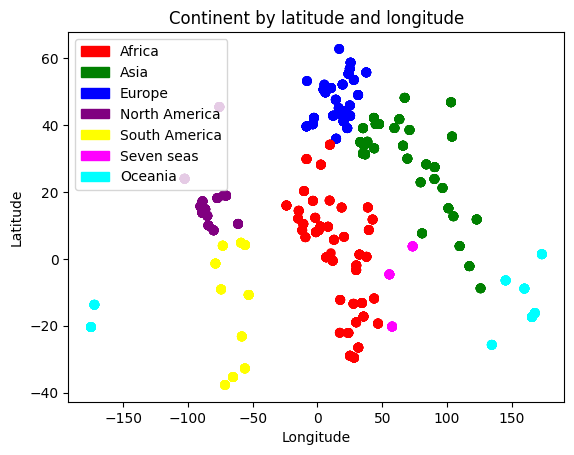

In [2]:
df_X = df[['Longitude', 'Latitude']]
df_Status = df[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))


plt.xlabel('Longitude')
plt.ylabel('Latitude')
#Add a legend for the continents colors

plt.legend(handles=[matplotlib.patches.Patch(color='red', label='Africa'),
                    matplotlib.patches.Patch(color='green', label='Asia'),
                    matplotlib.patches.Patch(color='blue', label='Europe'),
                    matplotlib.patches.Patch(color='purple', label='North America'),
                    matplotlib.patches.Patch(color='yellow', label='South America'),
                    matplotlib.patches.Patch(color='magenta', label='Seven seas'),
                    matplotlib.patches.Patch(color='cyan', label='Oceania')])
plt.title('Continent by latitude and longitude')

plt.show()




**QUESTION 1**

Identify each class with the plot colors.

What do the coordinates correspond to?


The coordinates correspond to the longitude and attitude of each country. That is why when applying clustering the image looks a bit like the 7 continents, only with a "Seven Seas" class instead of Antarctica.

**TO DO 1.2**

Execute the following cell


<module 'matplotlib.pyplot' from '/home/codespace/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

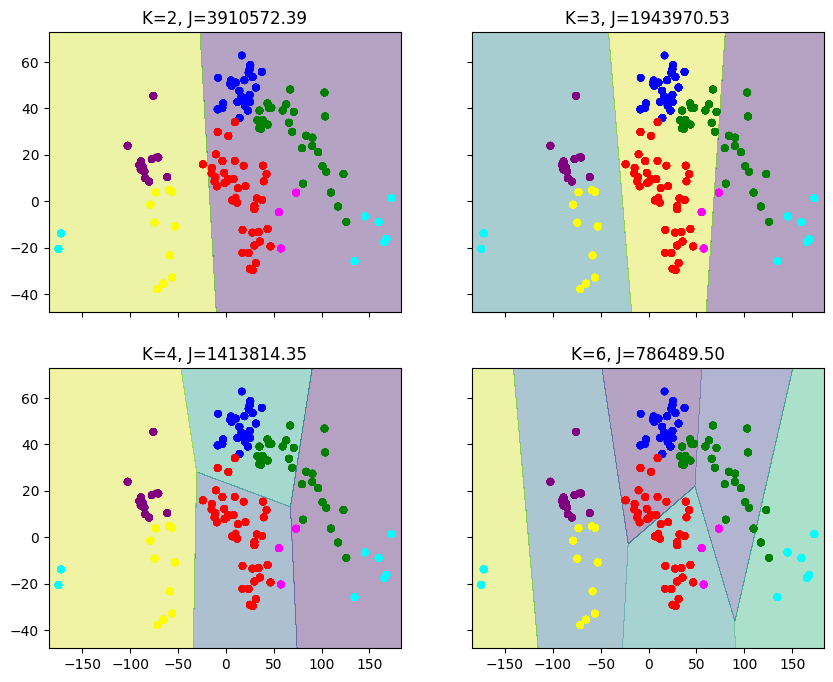

In [3]:
from itertools import product
from sklearn import cluster

#ignore the future warning and SettingWithCopyWarning 

import warnings 

warnings.simplefilter(action='ignore', category=FutureWarning)



x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

**QUESTION 2**

How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?

Which is the main problem with the mercator representation for continent detection?

Inertia for comparing clusters is a measure that helps quantify the dispersion of points in a given cluster. The less inertia it is concluded that the clustering has been better. However, for spatial datasets, methods like Silhouette Score work much better, as they work taking into account the cohesion of the data points, along with the separation of said points.

Alternative Metric for Spatial Datasets: Silhouette Score and Davies-Bouldin Index are better metrics for spatial datasets, as they account for cohesion and separation of data points in clusters, addressing spatial characteristics.

The mercator representation (which is the most common when we are presented with a map) distorts size, shape and even the distance between different landmasses. All of these small inaccuracies contribute to a larger error if you try to do classification by lcustering.


## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

[18.755341   16.71300506]
[48.755341   16.71300506]


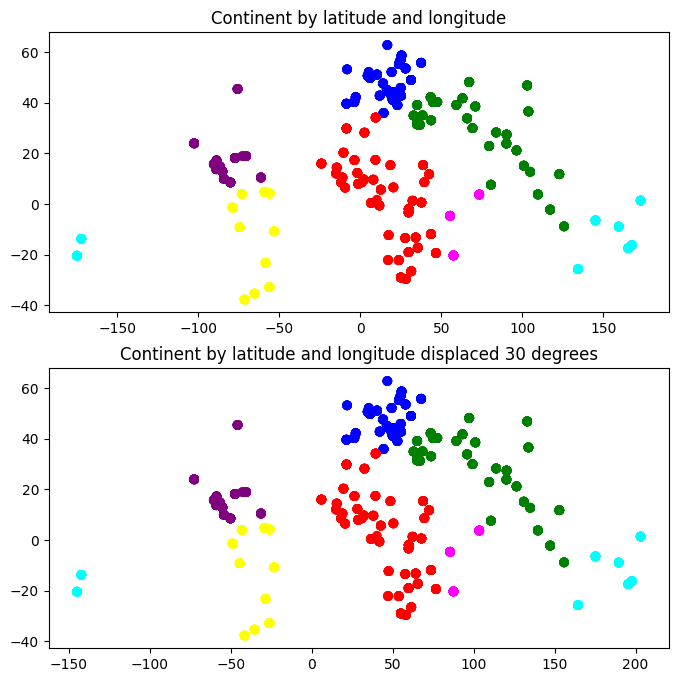

In [5]:


warnings.simplefilter(action='ignore', category=UserWarning)


df_X_displaced = df[['Longitude', 'Latitude']].copy()
df_X_displaced['Longitude'] = df_X_displaced['Longitude'].apply(lambda x: x + 30)
np_displaced = df_X_displaced.to_numpy()

print(np1.mean(axis=0))
print(np_displaced.mean(axis=0))





plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.title('Continent by latitude and longitude')

plt.subplot(2, 1, 2)
plt.scatter(np_displaced[:,0], np_displaced[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.title('Continent by latitude and longitude displaced 30 degrees')

plt.show()

#Print the mean of the np1 and np_displaced arrays



**QUESTION 3**

What are the advantages of this normalization?

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

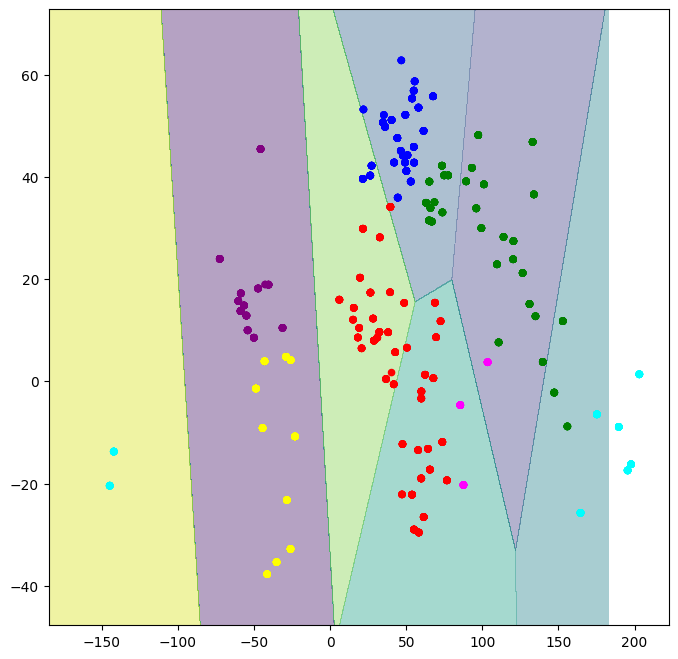

In [7]:
#Apply kmeans on the displaced data and plot the clusters on the displaced data, with k = 7

km7 = cluster.KMeans(n_clusters=7).fit(np_displaced)
Z = km7.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(np_displaced[:, 0], np_displaced[:, 1], c=np_Y,
            s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

plt.show()

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

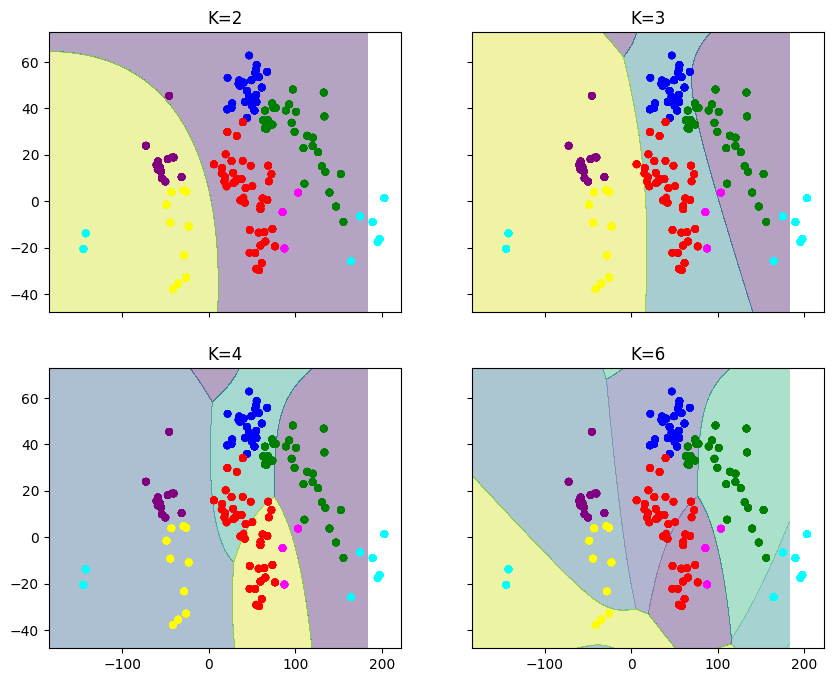

In [8]:


from sklearn.mixture import GaussianMixture

gm2 = GaussianMixture(n_components=2).fit(np_displaced)
gm3 = GaussianMixture(n_components=3).fit(np_displaced)
gm4 = GaussianMixture(n_components=4).fit(np_displaced)
gm6 = GaussianMixture(n_components=6).fit(np_displaced)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=2", "K=3", "K=4", "K=6"]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_displaced[:, 0], np_displaced[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

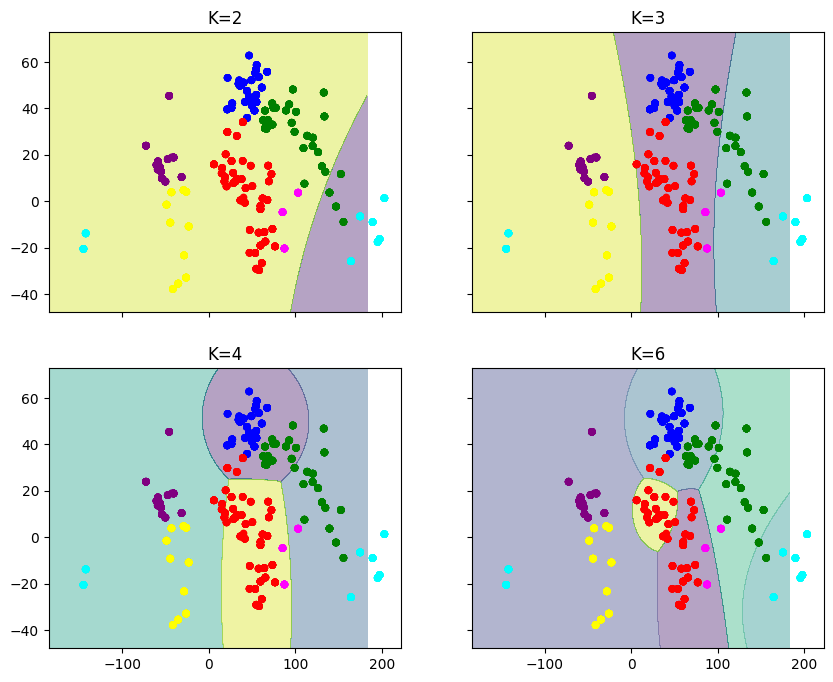

In [9]:


from sklearn.mixture import GaussianMixture

gm2 = GaussianMixture(n_components=2, covariance_type="diag").fit(np_displaced)
gm3 = GaussianMixture(n_components=3, covariance_type="diag").fit(np_displaced)
gm4 = GaussianMixture(n_components=4, covariance_type="diag").fit(np_displaced)
gm6 = GaussianMixture(n_components=6, covariance_type="diag").fit(np_displaced)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=2", "K=3", "K=4", "K=6"]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_displaced[:, 0], np_displaced[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

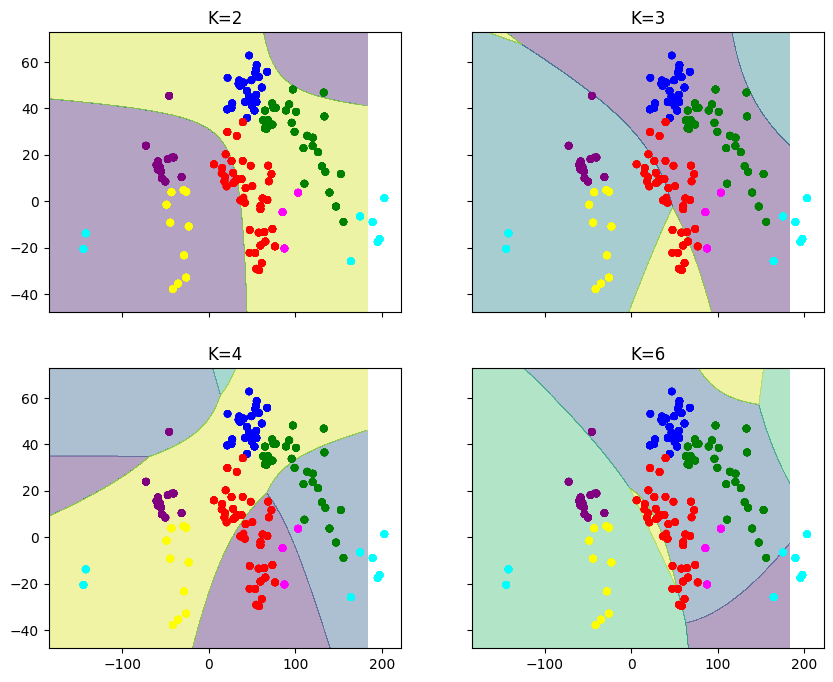

In [10]:


from sklearn.mixture import GaussianMixture

gm2 = GaussianMixture(n_components=2, init_params="random").fit(np_displaced)
gm3 = GaussianMixture(n_components=3, init_params="random").fit(np_displaced)
gm4 = GaussianMixture(n_components=4, init_params="random").fit(np_displaced)
gm6 = GaussianMixture(n_components=6, init_params="random").fit(np_displaced)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=2", "K=3", "K=4", "K=6"]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_displaced[:, 0], np_displaced[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**QUESTION 4**

Which is the best method to detect continents?

For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

In [28]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

# Define your custom distance function
def c(p1, p2):
    return 1-(p1.reshape((1, p1.shape[0])).dot(p2)/(np.linalg.norm(p1)*np.linalg.norm(p2)))[0]


import numpy as np

def transform(latitude, longitude):
    # Convert latitude and longitude from degrees to radians
    lat_rad = np.radians(latitude)
    lon_rad = np.radians(longitude)
    
    # Compute x, y, and z coordinates on the unit sphere
    x = np.cos(lat_rad) * np.cos(lon_rad)
    y = np.cos(lat_rad) * np.sin(lon_rad)
    z = np.sin(lat_rad)
    
    # Normalize the x, y, and z coordinates
    norm = np.sqrt(x**2 + y**2 + z**2)
    x /= norm
    y /= norm
    z /= norm
    
    # Return the normalized x, y, and z coordinates as a numpy array
    return np.array([x, y, z])


transformed = np.array([transform(point[0], point[1]) for point in np1])


#plot the transformed points into the 3D space interactive and rotatable plot

import plotly.graph_objs as go


fig.update_layout(width=800, height=800)
fig.show()



In [35]:
#Perfom clustering on the transformed 3d points with k = 7 and plot the clusters on the 3d plot

km7 = cluster.KMeans(n_clusters=7).fit(transformed)

from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])



fig.add_trace(go.Scatter3d(x=transformed[:,0], y=transformed[:,1], z=transformed[:,2], mode='markers', marker=dict(color=np_Y, colorscale='Viridis', opacity=0.8, size=2)), row=1, col=1)
fig.add_trace(go.Scatter3d(x=transformed[:,0], y=transformed[:,1], z=transformed[:,2], mode='markers', marker=dict(color=km7.labels_, colorscale='Viridis', opacity=0.8, size=2)), row=1, col=2)

fig.update_layout(width=1000, height=500, showlegend=False)
fig.show()


## STEP 3: Detection of caribbean island 

**TO CODE 3.1**

Isolate the North and South American continents.

**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.

**QUESTION 5**

Which is the outlier of this clustering problem?

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

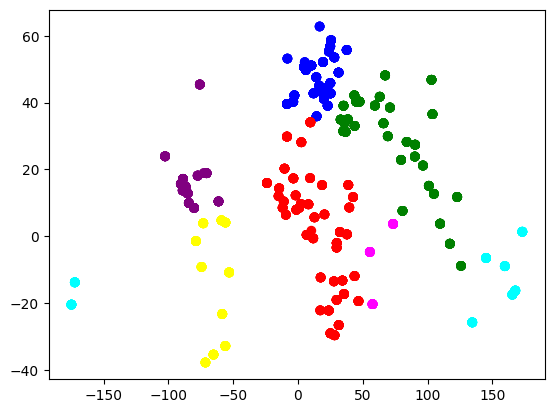

In [12]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()


In [13]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5480391558506639


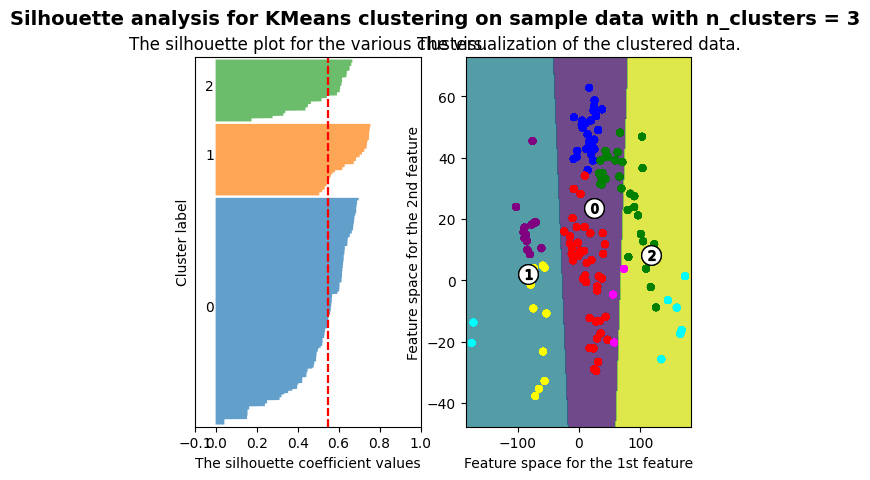

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

**Question 6** 

According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

**BONUS** 

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?


**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?

In [43]:

#QUESTION 1

df_2000 = df[(df.Year == 2000)]

#show the top 5 countries with highest alcohol consumption

df_2000.sort_values(by=['Alcohol'], ascending=False).head(10)




,Country,Longitude,Latitude,Continent,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
945,France,-2.761729,42.173440,Europe,2000,Developing,78.8,13.0,3,13.63,...,98.0,9.77,97.0,0.1,22465.641840,6912498.0,0.7,0.6,0.844,15.7
143,Austria,14.126476,47.585494,Europe,2000,Developed,78.1,96.0,0,13.20,...,71.0,1.60,81.0,0.1,24517.267450,811566.0,1.7,1.9,0.833,15.4
1553,Luxembourg,6.071822,49.767254,Europe,2000,Developed,77.8,98.0,0,13.14,...,99.0,7.48,99.0,0.1,48735.995490,4363.0,1.0,1.0,0.848,13.5
239,Belarus,28.032093,53.531314,Europe,2000,Developing,68.0,247.0,1,12.98,...,99.0,6.13,99.0,0.1,1276.288340,997961.0,2.7,2.8,0.675,13.1
1009,Germany,10.385781,51.106982,Europe,2000,Developed,78.0,95.0,3,12.91,...,94.0,1.10,9.0,0.1,23718.746700,8221158.0,1.2,1.2,0.855,16.2
2070,Portugal,-8.501044,39.595507,Europe,2000,Developed,76.6,11.0,1,11.89,...,96.0,9.14,96.0,0.1,1152.396810,1289898.0,0.8,0.6,0.777,15.5
255,Belgium,4.640651,50.639816,Europe,2000,Developed,77.6,11.0,1,11.21,...,96.0,8.12,95.0,0.1,2327.459100,125125.0,0.8,0.8,0.869,18.0
2440,Spain,-3.647550,40.244487,Europe,2000,Developed,79.1,86.0,2,11.12,...,95.0,7.21,95.0,0.1,14676.769000,4567864.0,0.6,0.5,0.820,15.7
2134,Romania,24.972930,45.852431,Europe,2000,Developed,77.0,175.0,4,10.16,...,99.0,4.33,99.0,0.1,1668.162731,22442971.0,4.0,4.3,0.703,11.5
1537,Lithuania,23.887194,55.326110,Europe,2000,Developed,71.6,2.0,0,9.87,...,92.0,6.46,94.0,0.1,3297.354710,3499536.0,3.4,3.4,0.745,14.0


In [72]:
#QUESTION 2


#From df_2000 give me the rows which Alcohol is greater than 8.24

df_2000_alcohol = df_2000[df_2000.Alcohol > 12]


<Axes: >

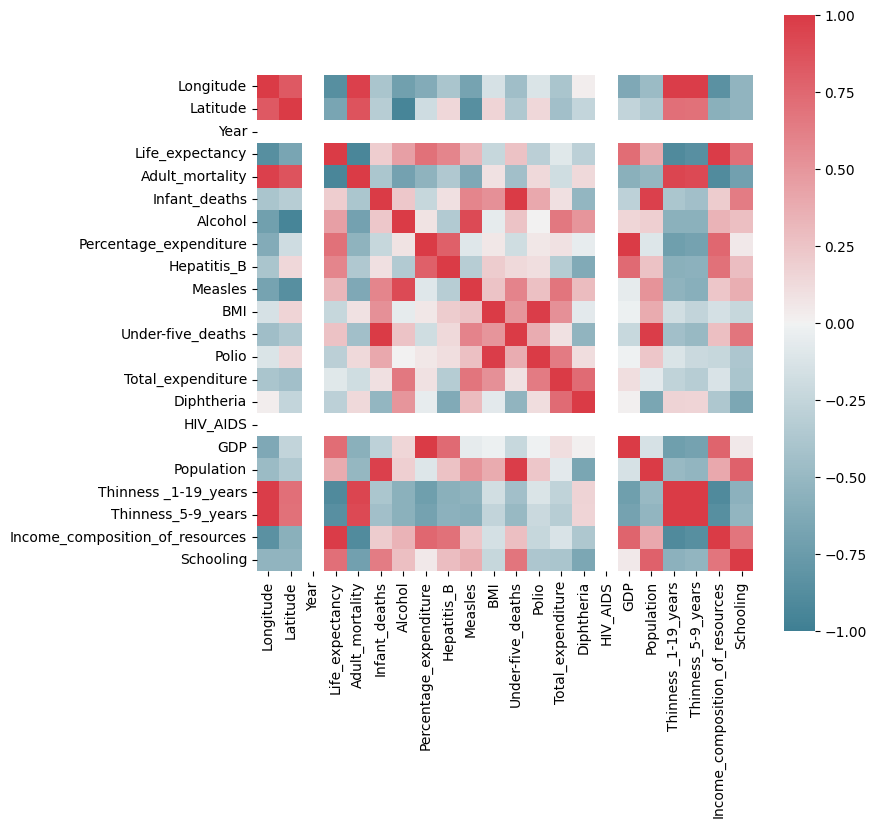

In [73]:
import seaborn as sns

f, ax = plt.subplots(figsize=(8, 8))
corr = df_2000_alcohol.corr(numeric_only=True)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

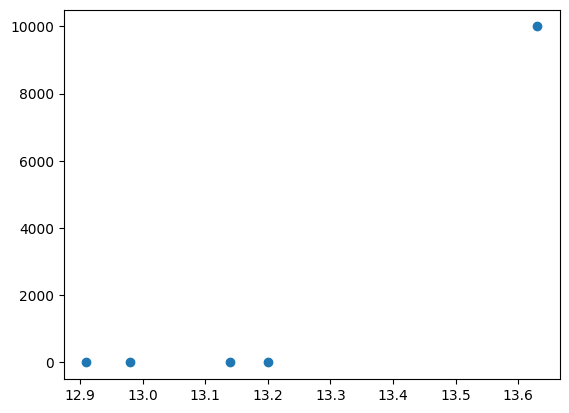

In [74]:
#For df_2000_alcohol plot the hepatitis vs alcohol

plt.scatter(df_2000_alcohol.Alcohol , df_2000_alcohol.Measles)
